In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sounddevice
import librosa

In [3]:
def separate_hp(arr, fs):
    nperseg = int(0.03*fs)
    noverlap = int(0.01*fs)
    h_win = 100
    p_win = 100
    _, _, s = sp.signal.stft(arr, nperseg=nperseg, noverlap=noverlap)
    
    h_mask = sp.ndimage.median_filter(abs(s), (1, h_win))
    p_mask = sp.ndimage.median_filter(abs(s), (p_win, 1))
    
    h = np.where(h_mask > p_mask, s, 10e-5)
    p = np.where(p_mask > h_mask, s, 10e-5)
    
    _, ih = sp.signal.istft(h, nperseg=nperseg, noverlap=noverlap)
    _, ip = sp.signal.istft(p, nperseg=nperseg, noverlap=noverlap)
    
    return ih, ip

In [4]:
%store -r song_data
song, fs = song_data

In [10]:
h, p = separate_hp(song, fs)

In [9]:
sounddevice.play(p, fs)

In [11]:
sounddevice.stop()

In [8]:
nperseg = int(0.03*fs)
noverlap = int(0.01*fs)
lh, lp = librosa.decompose.hpss(sp.signal.stft(song, nperseg=nperseg, noverlap=noverlap)[2])

In [12]:
h_win = 100
p_win = 100
_, _, s = sp.signal.stft(song, nperseg=nperseg, noverlap=noverlap)

h_mask = sp.ndimage.median_filter(abs(s), (1, h_win))
p_mask = sp.ndimage.median_filter(abs(s), (p_win, 1))

h = np.where(h_mask > p_mask, s, 10e-5)
p = np.where(p_mask > h_mask, s, 10e-5)

<ipython-input-13-0a9fd6bc79b9>:2: RuntimeWarning: divide by zero encountered in log
  axs[0, 0].pcolormesh(np.log(abs(lh)))
<ipython-input-13-0a9fd6bc79b9>:3: RuntimeWarning: divide by zero encountered in log
  axs[0, 1].pcolormesh(np.log(abs(lp)))
<ipython-input-13-0a9fd6bc79b9>:4: RuntimeWarning: divide by zero encountered in log
  axs[1, 0].pcolormesh(np.log(abs(h)))


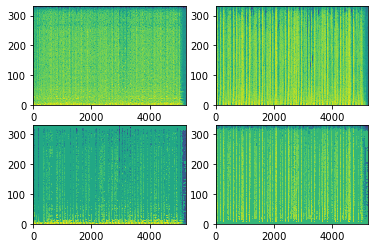

In [13]:
_, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(np.log(abs(lh)))
axs[0, 1].pcolormesh(np.log(abs(lp)))
axs[1, 0].pcolormesh(np.log(abs(h)))
axs[1, 1].pcolormesh(np.log(abs(p)))

In [4]:
np.array([np.complex64])

NameError: name 'i2' is not defined